In [2]:
from pathlib import Path
import re

import scope
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.1, palette="Paired")
plt.rcParams['figure.dpi'] = 300

In [4]:
def _read_float_file(path: Path):
    reader = scope.Reader(path)
    steps, episode_scores = reader['episode/score']
    return np.asarray(episode_scores)[:200]

def plot(files_labels=[], output=None):
    plt.figure(figsize=(10, 6))

    bars = []
    labels = []
    for path, label in files_labels:
        bars.append(_read_float_file(Path(path)).mean())
        labels.append(label)

    sns.barplot(y=bars, x=labels, hue=labels)

    plt.xlabel("Environment Setting")
    plt.ylabel("Average Reward")
    plt.title(f"Average reward over 200 episodes")
    # plt.grid(alpha=0.3)
    # plt.legend()
    plt.tight_layout()
    if output:
        plt.savefig(output, dpi=300)
        print(f"Saved figure → {output}")

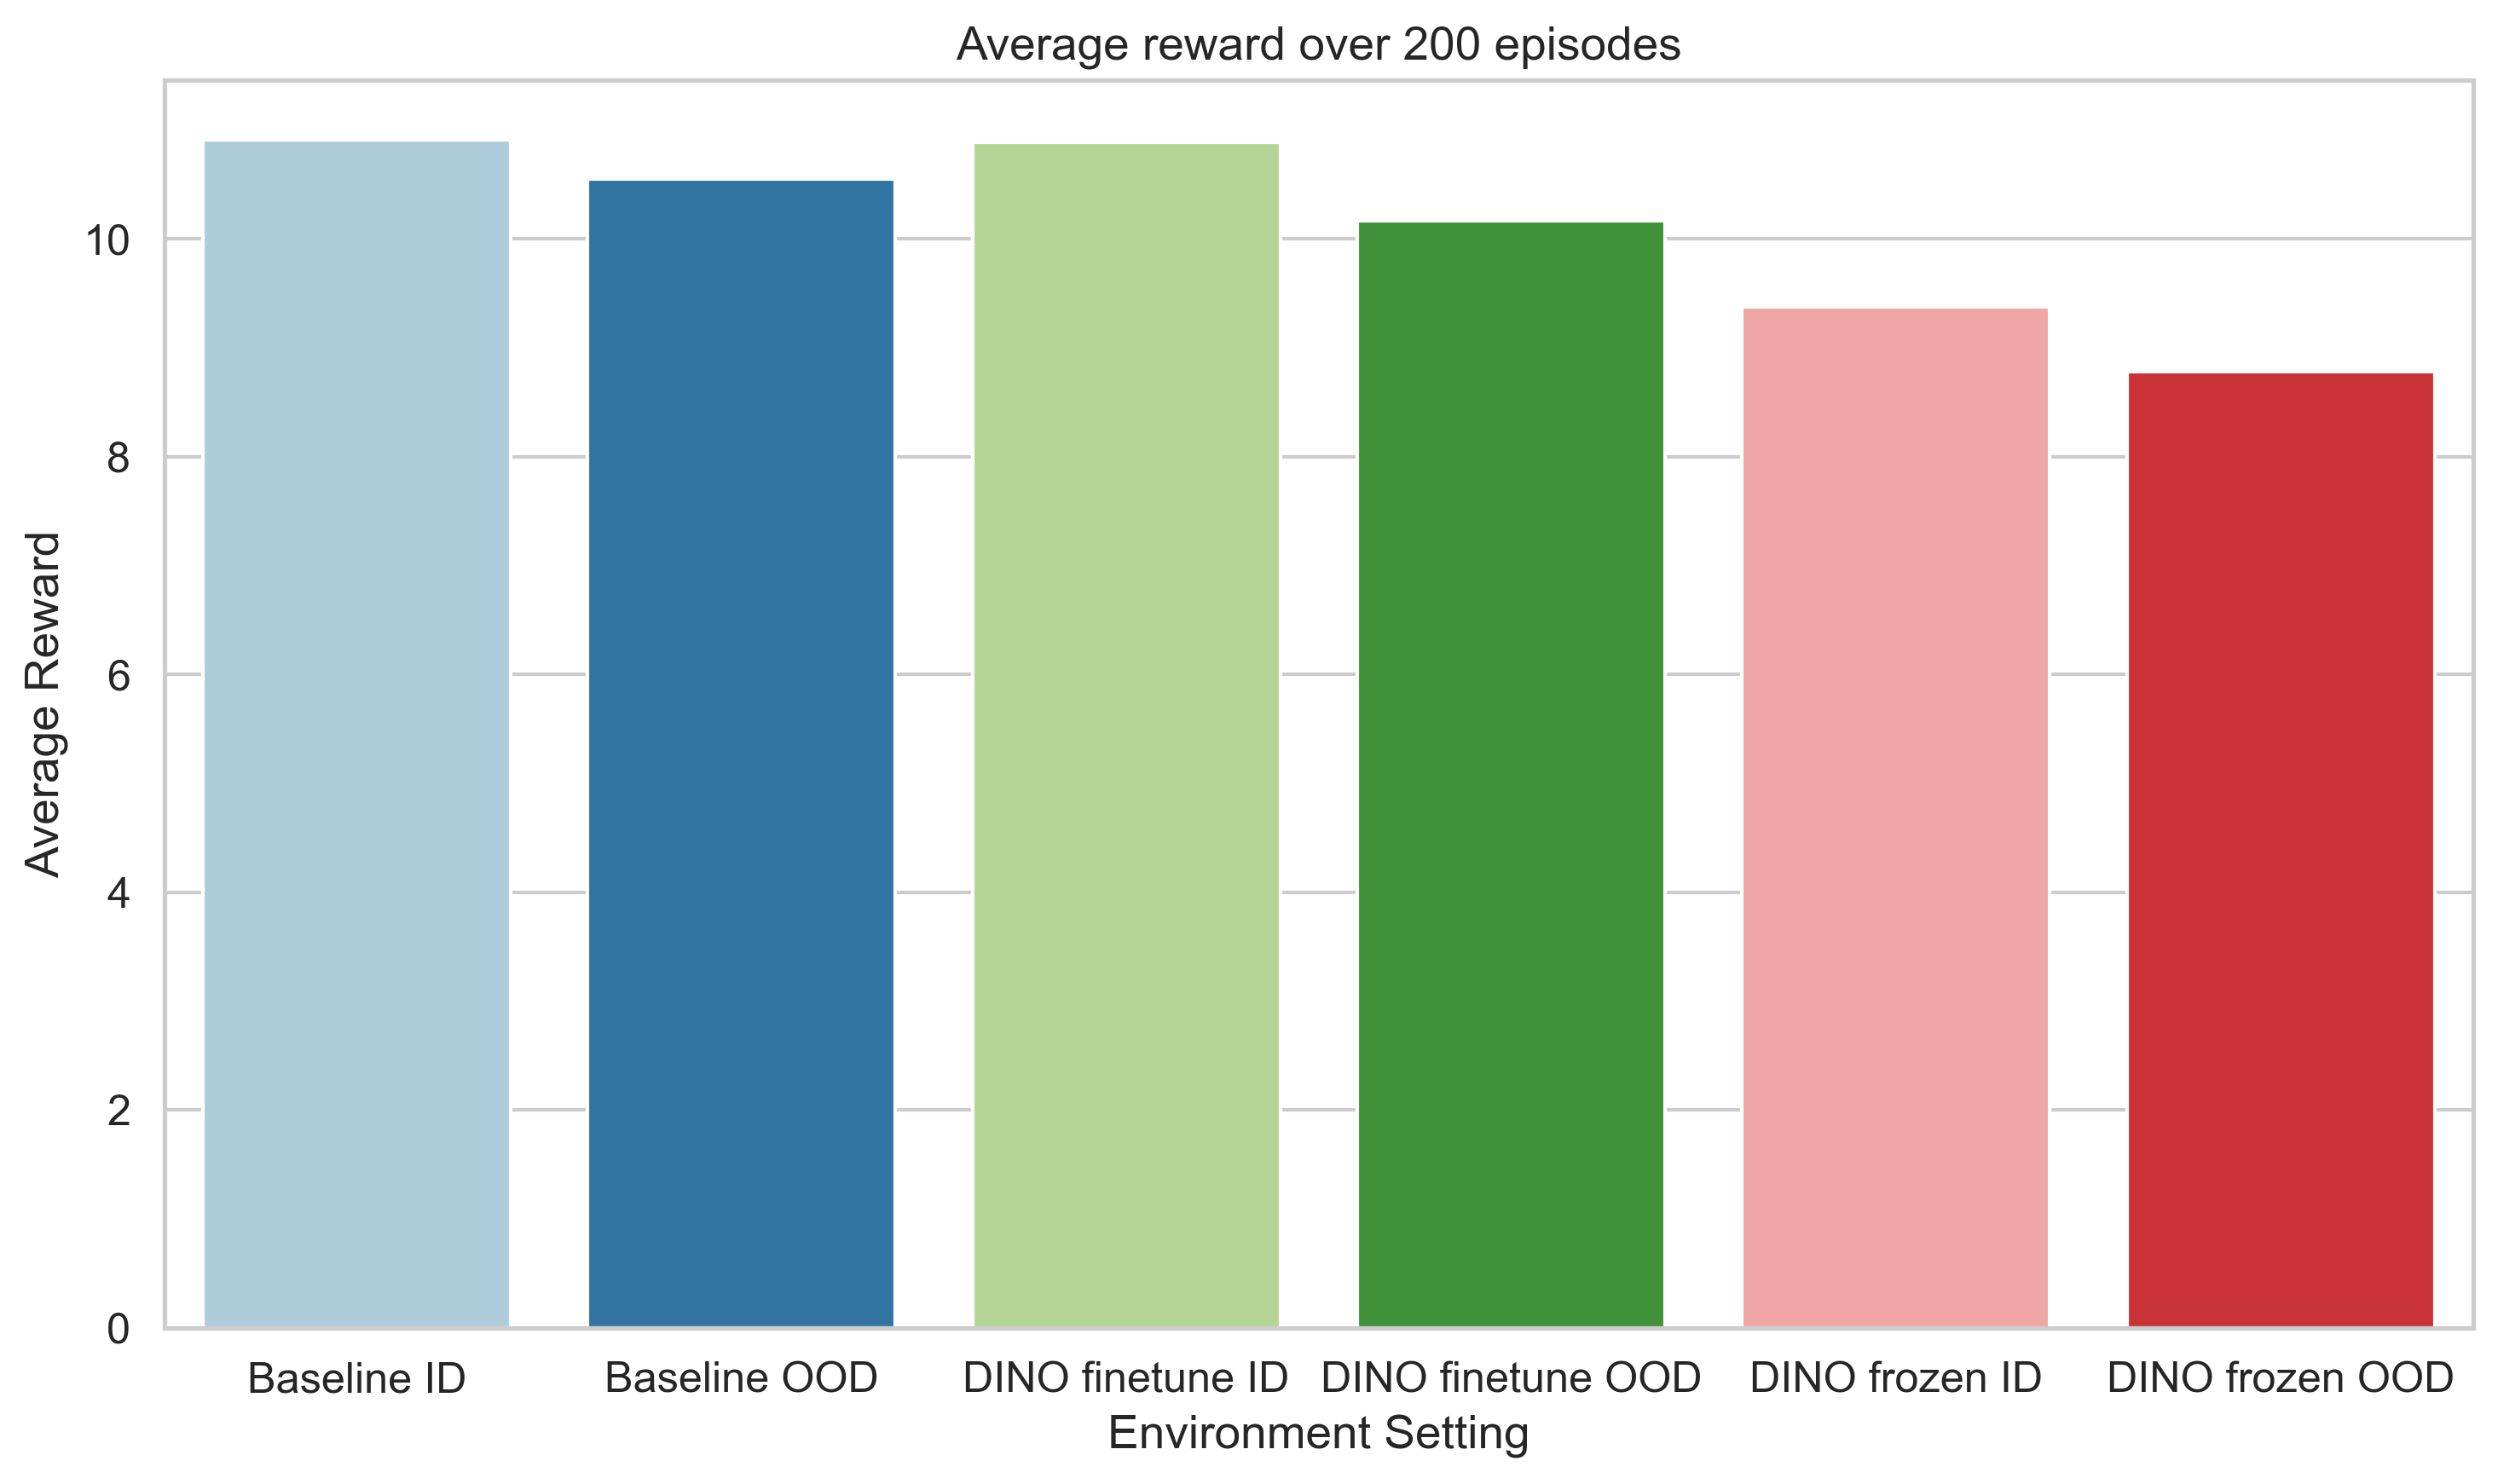

In [5]:
plot(
    files_labels=[
        ("logdir/baseline_pick_ycb_eval_ID/", "Baseline ID"),
        ("logdir/baseline_pick_ycb_eval_OOD/", "Baseline OOD"),
        ("logdir/DINOFT_pick_ycb_eval_ID/", "DINO finetune ID"),
        ("logdir/DINOFT_pick_ycb_eval_OOD/", "DINO finetune OOD"),
        ("logdir/DINOFreeze_pick_ycb_eval_ID/", "DINO frozen ID"),
        ("logdir/DINOFreeze_pick_ycb_eval_OOD/", "DINO frozen OOD"),
    ]
)

## Catastrophic Forgetting
In this experiment we train a K-Nearest Neighbours model on the output representation from the DinoV2 models before and after end-to-end finetuning with DreamerV3. In this small diagnostic test we trained using a 80:20 split from 20k ImageNet images.

/var/folders/sz/_6t9n1rn6b7bxg8p0wzyw0g00000gn/T/ipykernel_32586/3750713320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=imagenet_knn_accuracy, x=imagenet_knn_labels, palette="Set2")


<Axes: title={'center': 'Catastrophic Forgetting: ImageNet KNN Accuracy (5 Neighbours)'}, xlabel='Model Type', ylabel='Test Accuracy (%)'>

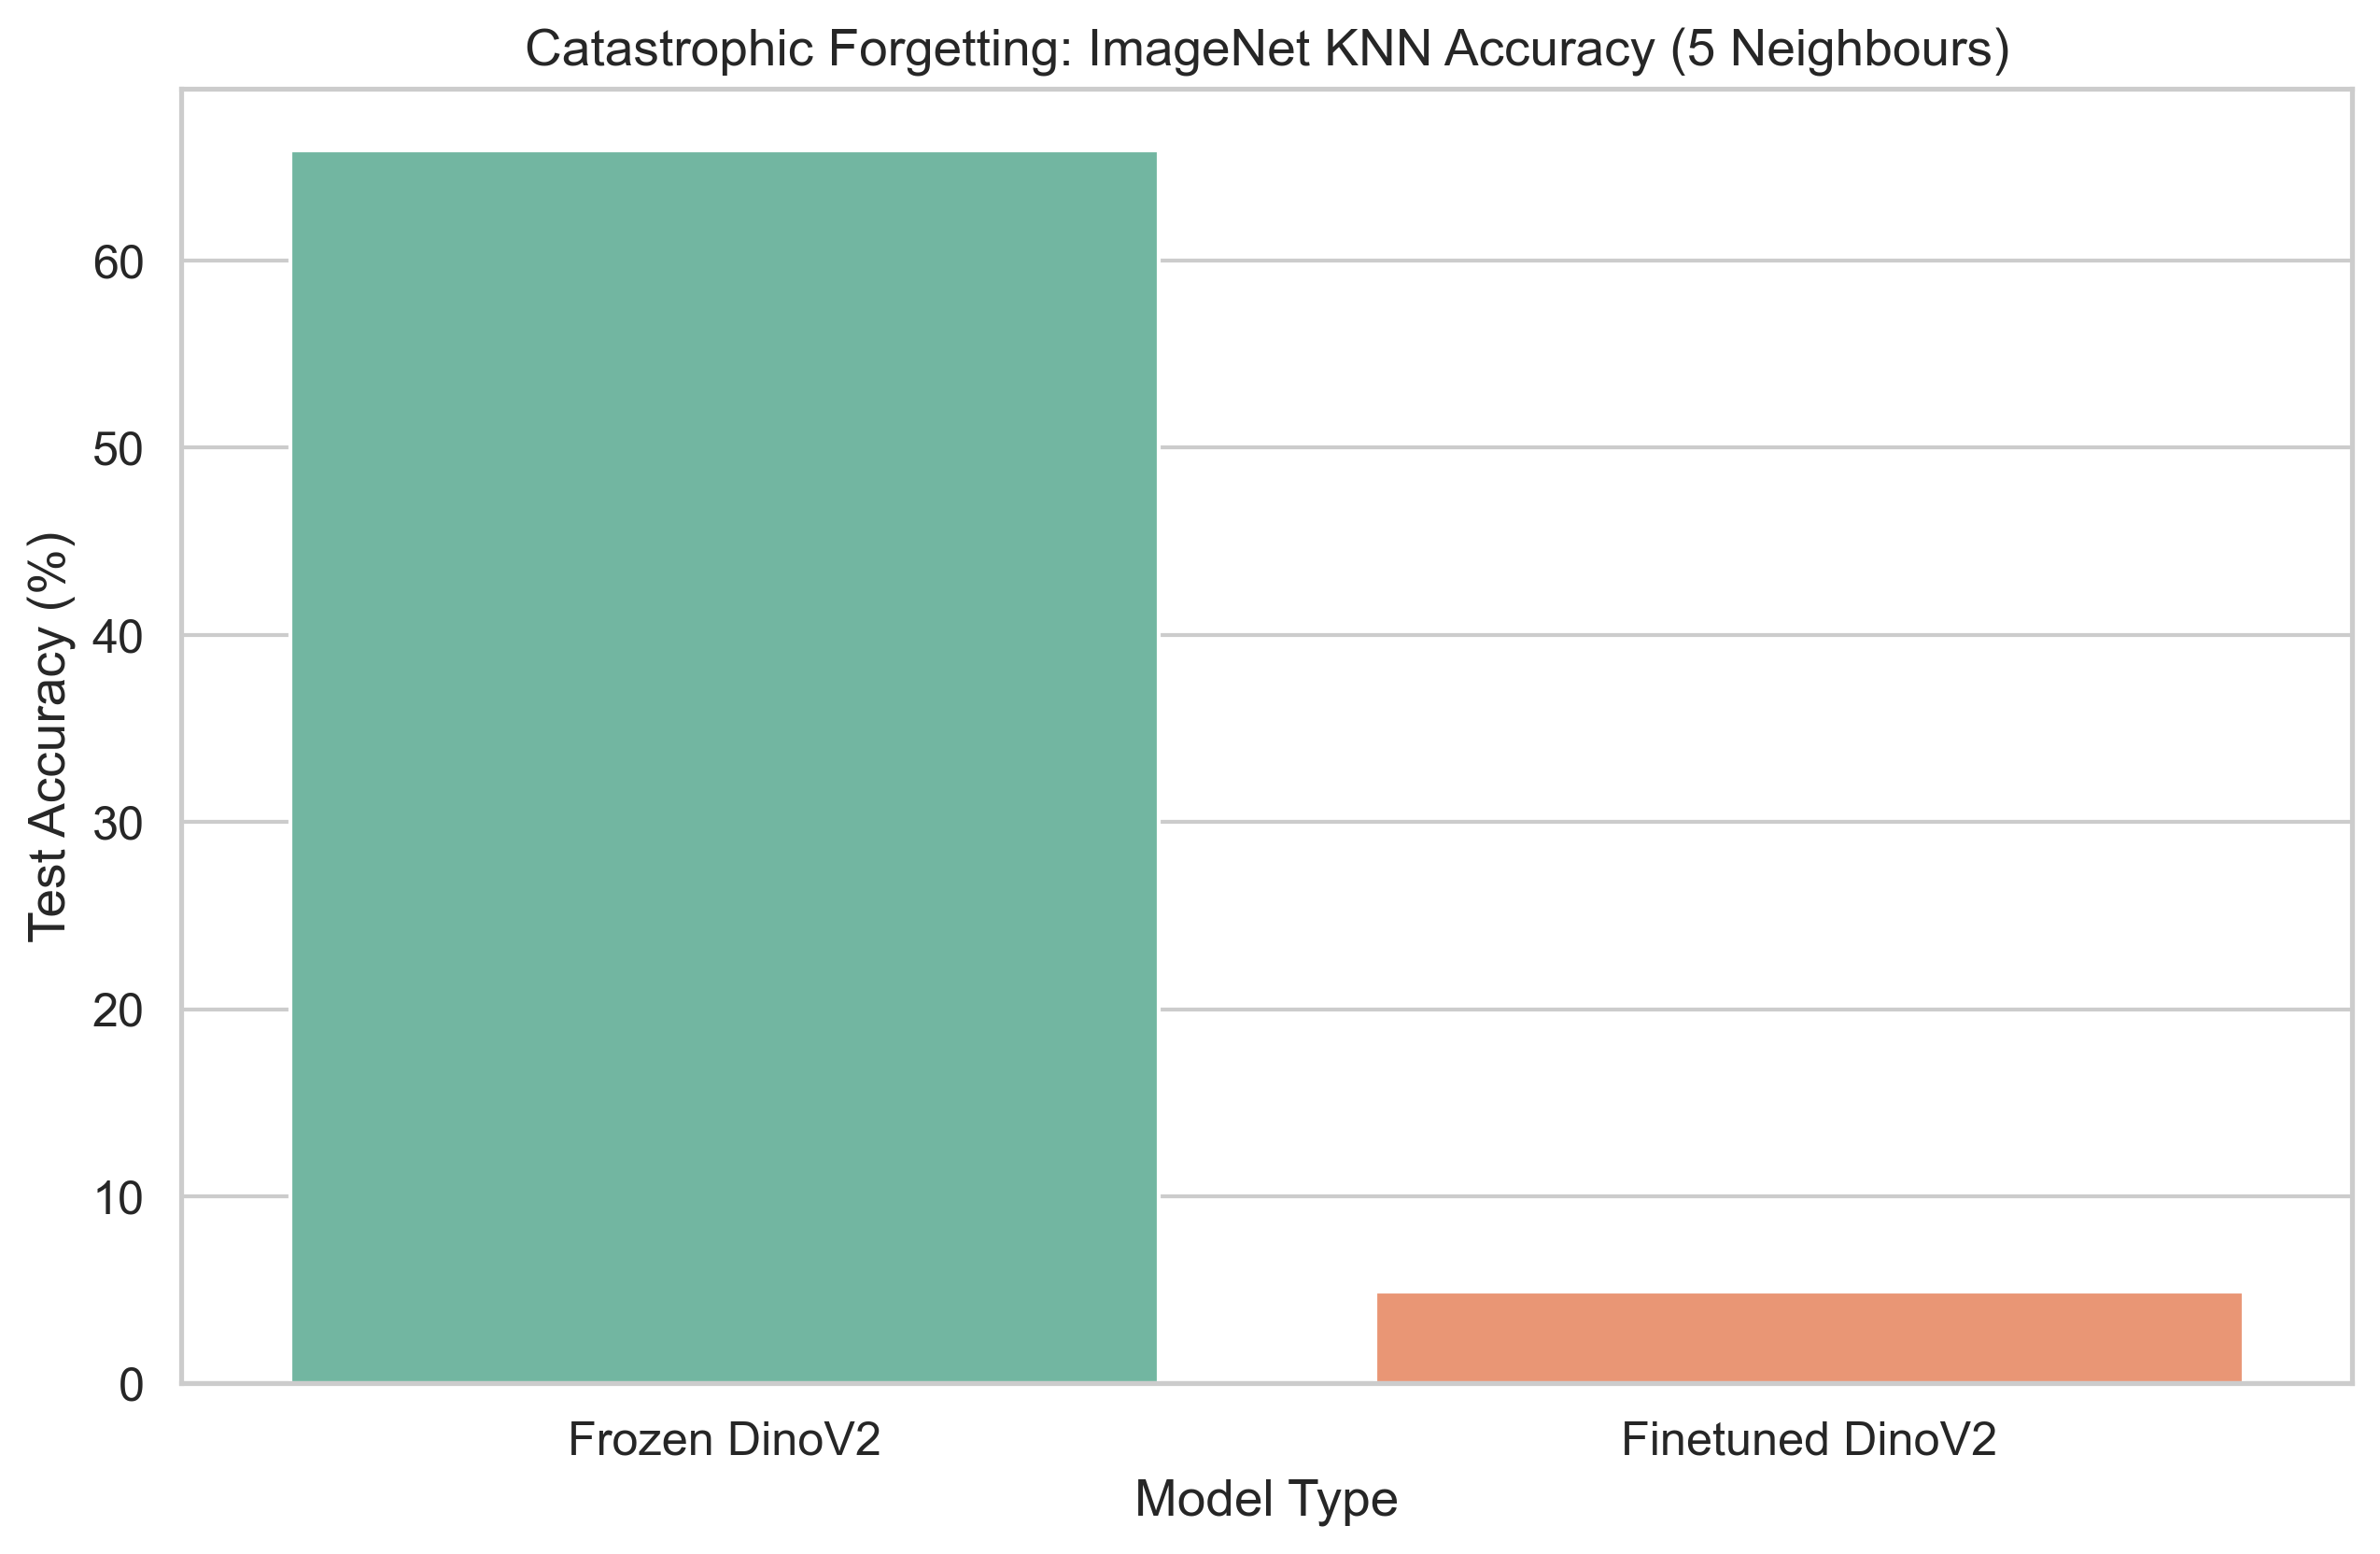

In [10]:
imagenet_knn_accuracy = [65.88, 4.92]
imagenet_knn_labels = ["Frozen DinoV2", "Finetuned DinoV2"]
plt.figure(figsize=(10, 6))
plt.xlabel("Model Type")
plt.ylabel("Test Accuracy (%)")
plt.title(f"Catastrophic Forgetting: ImageNet KNN Accuracy (5 Neighbours)")
sns.barplot(y=imagenet_knn_accuracy, x=imagenet_knn_labels, palette="Set2")